# Analyzing the Data
- **Name: Andrew Angulo**
- **Data Systems Project**

The purpose of Analyzing the data is to visualize and represent the information we have stored within SQL, doing this further allows us to answer our central question: **are some characters are better than others based on their stats, and how much would the player have to invest in the game to acquire that character?**

---
### Description of Imports:

- we use **pandas** to represent our data from SQL into a tabular dataframe


- we use **os.path** in order to obtain the file based on the location specificed within the computer


- we use **json** so we are able to load data from a JSON files such as creds.json


- we use **sqlalchemy** so we are able to interact with the SQL database


- we use **math** so we can round numbers and are able to perform more mathematical abilities


- we use **random** so we are able to retrieve a random set of numbers


- we use **numpy** so we can use it in helping us displaying our data onto matplotlib


- we use **matplotlib.pyplot** so we can print out a picture of our data

In [1]:
import pandas as pd
import os.path
import json
import sqlalchemy as sa
import math
import random
import numpy as np
import matplotlib.pyplot as plt

%load_ext sql

---
### Utilizing the functions
Below are functions that help us retrieve information in order to help us interact with the SQL database
- **getsqlite_creds** : strings
    - returns strings of the specificed content within creds.json
    
    
- **buildConnectionString** : string
    - returns a string with the specified path of the database file based on the previouse function

In [2]:
def getsqlite_creds(dirname=".",filename="creds.json",source="sqlite"):
    """ Using directory and filename parameters, open a credentials file
        and obtain the two parts needed for a connection string to
        a local provider using the "sqlite" dictionary within
        an outer dictionary.  
        
        Return a scheme and a dbfile
    """
    assert os.path.isfile(os.path.join(dirname, filename))
    with open(os.path.join(dirname, filename)) as f:
        D = json.load(f)
    sqlite = D[source]
    return sqlite["scheme"], sqlite["dbdir"], sqlite["database"]

In [3]:
def buildConnectionString(source):
    scheme, dbdir, database = getsqlite_creds(source=source)
    template = '{}:///{}/{}.db'
    return template.format(scheme, dbdir, database)

### Connecting to the SQL Database

With all of the functions utilized above we are finally allowed to
connect to the SQL database as if everything passed we connect to the engine

In [4]:
# Build the conection string
cstring = buildConnectionString("sqlite_arknights")
print("Connection string:", cstring)

# Connect to the database
engine = sa.create_engine(cstring)
connection = engine.connect()

Connection string: sqlite:///dbfile/arknights.db


In [5]:
%sql $cstring

### How is the data stored?
Currently all of the data we are retrieving from the SQL database is stored in a **.db file** within the folder **dbfile**. Entering this file presents us with all of the tables that it contains. The tables within this database files also contains constraints which allows certain values to have a certain condition set to them

### What Queries will I create?
The queries I will create will be the following

- **Query 1:**
    - The first query will inner join operators table and banners table so it can present all of the characters stats of that upcoming banner
    
- **Query 2:**
    - The second query will also do an inner join on operators table and popular table so it can show all of the stats  of the current popular characters
    
- **Query 3:**
    - The third query will do an inner join on popular, banners, and operators so that it presents any of the popular characters that possibly come within the upcoming banners with their stats.
    
- **Query 4:**
    - The forth and final query will do an inner join on operators and banners while grouping by characterID and bannerName and       filtering to see if their are characters upcoming with the specific result within their stats
    
### Does it adhere to the principles of good database design?
Yes it does! Each column represent their own distinctive value, the databases are divided so our information are into subject-based tables. Our information also provides access to use inner joins from table to table. The attributes are used strictly for identification purposes such as identifying an operator and their stats! Overrall this database does apply with the principles of good database design!

---
### Query1

Now that we are connected to the SQL Database we are able to perform querys.
Below is a query where it inner joins operators table and the banner table using characterID as the primary key. Looking at this SQL database allows us to visually think about if an upcoming character within the specific banner is worth to pull for based on their stats.

In [6]:
query1 = """
SELECT *
FROM operators AS op INNER JOIN banners AS ban USING(characterID)
"""


resultset1 = %sql $query1
resultdf1 = resultset1.DataFrame()

resultdf1

 * sqlite:///dbfile/arknights.db
Done.


,characterID,HP,ATK,DEF,COST,RES,BLOCK,REDEPLOY,INTERVAL,TARGET,DMG,ROLE,bannerName,ChineseDate
0,Blue Poison,1230,610,130,13,5,1,70,1.00,1,Physical,Sniper,Dissonanzen,2022-06-09 - 2022-06-23
1,Ptilopsis,1610,390,150,17,0,1,70,2.85,3,Healing,Medic,Pathfinder of Sands,2022-07-05 - 2022-07-19
2,Gavial the Invincible,2906,816,451,24,0,3,70,1.20,AoE,Physical,Guard,Great Axe and Pen Nib - [Summer] Series Limite...,2022-08-11 - 2022-08-25
3,Skyfire,1620,874,122,33,20,1,70,2.90,AoE,Arts,Caster,Joint Operation 7,2022-08-25 - 2022-09-08
4,Franka,3768,1011,260,18,0,1,70,1.50,1,Physical,Guard,Never Vowed,2022-09-08 - 2022-09-22
5,Jackie,2378,589,308,9,0,1,70,0.78,1,Physical,Guard,The Front That Was,2022-09-27 - 2022-10-11
6,Cliffheart,1970,835,340,13,0,2,70,1.80,1,Physical,Specialist,Bearing and Sparks,2022-10-11 - 2022-10-25
7,Texas the Omertosa,1598,659,320,10,0,1,18,0.93,1,Physical,Specialist,Chop the Thorns: Open Circuits - Celebration S...,2022-11-01 - 2022-11-15
8,Sora,1356,385,258,7,0,1,70,1.00,1,Healing,Supporter,Joint Operation 8,2022-11-15 - 2022-11-29
9,Pramanix,1605,495,102,12,25,1,70,1.60,1,Arts,Supporter,Edelweiss' Vow Rerun,2022-12-01 - 2022-12-15


### Query2

Query 2 uses INNER JOIN within operators table and the popular table, thus results in returning a pandas datframe translated from SQL. The goal of this query is that it shows the top characters that are popular in the present day but at the same time it also presents the stats of that specific character. This helps us answer our central question because this allows the player to further assume if other characters are better than other characters they possibly had in mind

In [7]:
query2 = """
SELECT *
FROM operators AS op INNER JOIN popular AS pop USING(characterID)
ORDER BY ATK DESC
"""


resultset2 = %sql $query2
resultdf2 = resultset2.DataFrame()

resultdf2

 * sqlite:///dbfile/arknights.db
Done.


,characterID,HP,ATK,DEF,COST,RES,BLOCK,REDEPLOY,INTERVAL,TARGET,DMG,ROLE
0,Skadi,3866,1095,303,19,0,1,70,1.50,1,Physical,Guard
1,Erato,1798,1027,125,23,0,1,70,2.40,1,Physical,Sniper
2,Mudrock,4428,882,662,36,10,3,70,1.60,1,Physical,Defender
3,Gladiia,2309,851,381,16,0,2,80,1.80,1,Physical,Specialist
4,Specter the Unchained,2803,817,322,16,0,2,70,1.20,1,Physical,Specialist
5,Surtr,2916,772,414,21,15,1,70,1.25,1,Arts,Guard
6,La Pluma,2250,725,452,22,0,2,70,1.30,1,Physical,Guard
7,Irene,2935,701,369,23,0,2,70,1.30,1,Physical,Guard
8,Texas the Omertosa,1598,659,320,10,0,1,18,0.93,1,Physical,Specialist
9,Lumen,1825,585,141,23,10,1,80,2.85,1,Healing,Medic


### Query3

Query 3 uses an INNER JOIN within the popular table and the banners table. The goal of this is to represent if any of the popular characters users are interested today are going to be available within the upcoming banners, this will allow users to question if they should save their resources for this upcoming banner to pull the desired operator.

In [8]:
query3 = """
SELECT *
FROM popular AS pop INNER JOIN  banners AS ban USING(characterID) INNER JOIN operators as op USING(characterID)
"""


resultset3 = %sql $query3
resultdf3 = resultset3.DataFrame()

resultdf3

 * sqlite:///dbfile/arknights.db
Done.


,characterID,bannerName,ChineseDate,HP,ATK,DEF,COST,RES,BLOCK,REDEPLOY,INTERVAL,TARGET,DMG,ROLE
0,Texas the Omertosa,Chop the Thorns: Open Circuits - Celebration S...,2022-11-01 - 2022-11-15,1598,659,320,10,0,1,18,0.93,1,Physical,Specialist
1,Mudrock,The Front That Was,2022-09-27 - 2022-10-11,4428,882,662,36,10,3,70,1.60,1,Physical,Defender
2,La Pluma,Joint Operation 7,2022-08-25 - 2022-09-08,2250,725,452,22,0,2,70,1.30,1,Physical,Guard


### Query4

Query 4 uses an INNER JOIN between operators table and banners table while grouping by those two columns and filtering where the ATK an HP of a certain character is greater than a certain value. This allows us to see which characters within the upcoming banners are actually "strong" characters, this allows the user to consider getting these characters as they provide an edge at completing levels faster.

In [52]:
query4 = """
SELECT *
FROM operators AS op INNER JOIN  banners AS ban USING(characterID)
GROUP BY characterID, bannerName
HAVING ATK <= 1000 AND HP > 1000
"""


resultset4 = %sql $query4
resultdf4 = resultset4.DataFrame()

resultdf4

 * sqlite:///dbfile/arknights.db
Done.


,characterID,HP,ATK,DEF,COST,RES,BLOCK,REDEPLOY,INTERVAL,TARGET,DMG,ROLE,bannerName,ChineseDate
0,Ashlock,3207,915,591,27,0,3,70,2.80,1,Physical,Defender,Joint Operation 8,2022-11-15 - 2022-11-29
1,Aurora,4027,956,695,32,0,1,70,1.60,1,Physical,Defender,Edelweiss' Vow Rerun,2022-12-01 - 2022-12-15
2,Ayerscarpe,2420,745,375,19,10,2,70,1.30,AoE,Physical,Guard,Joint Operation 8,2022-11-15 - 2022-11-29
3,Bagpipe,2484,671,382,13,0,1,70,1.00,1,Physical,Vanguard,Joint Operation 7,2022-08-25 - 2022-09-08
4,Blue Poison,1230,610,130,13,5,1,70,1.00,1,Physical,Sniper,Dissonanzen,2022-06-09 - 2022-06-23
5,Cantabile,1917,590,297,10,0,1,35,1.00,1,Physical,Vanguard,Great Axe and Pen Nib - [Summer] Series Limite...,2022-08-11 - 2022-08-25
6,Carnelian,2106,926,258,24,15,1,70,2.00,AoE,Arts,Caster,Joint Operation 7,2022-08-25 - 2022-09-08
7,Chestnut,1237,424,101,14,10,1,70,2.85,1,Healing,Medic,The Front That Was,2022-09-27 - 2022-10-11
8,Cliffheart,1970,835,340,13,0,2,70,1.80,1,Physical,Specialist,Bearing and Sparks,2022-10-11 - 2022-10-25
9,Corroserum,1572,850,120,33,20,1,70,2.90,AoE,Arts,Caster,Joint Operation 8,2022-11-15 - 2022-11-29


---
### Creating Functions to compare and analyze our data

In order to analyze out data further and further come to the conclusion to our central question to see **if some operators are better than other ones** building these functions will help us organize our data and allow us to come to our conclusion relatively simpler

In [15]:
def compareOperator(operator1, operator2):
    """
    Returns a string of which
    operator is better than one another
    while grabbing data from a pandas dataframe taken
    from a SQL database
    
    Parameters
    ----------
    operator1 : string
        - The first parameter
    operator2 : string
        - The second parameter
        
    Returns
    -------
    String : String
        - A string indicating which operator is better
    """
    resultDict = {operator1: 0, operator2: 0}
    character1 = resultdf1['characterID'].values == operator1
    df_op1 = resultdf1.loc[character1]
    character2 = resultdf1['characterID'].values == operator2
    df_op2 = resultdf1.loc[character2]
    compareDF = pd.concat([df_op1, df_op2]).set_index('characterID')
    compareDict = pd.DataFrame.to_dict(compareDF)
    for i in compareDict:
        D = []
        if(i == "TARGET"):
            break
        for j in list(compareDict[i].values()):
            D.append(j)
            if(len(D) >= 2):
                if(D[0] > D[1]):
                    resultDict[operator1] += 1
                elif(D[0] == D[1]):
                    resultDict[operator1] += 1
                    resultDict[operator2] += 1
                else:
                    resultDict[operator2] += 1
    if(resultDict[operator1] > resultDict[operator2]):
        return operator1 + " is better compared to " + operator2
    elif(resultDict[operator1] == resultDict[operator2]):
        return operator1 + " and " + operator2 + " are both equally good"
    return operator2 + " is better compared to " + operator1

#-------------------------------------------------------------------------------#
def orundumCalculator(current, days, daily_missions=True, monthlycard=False, weekly_annihilation=False):
    """
    Returns the amount of orundums a user 
    will have after x amount of days
    
    Parameters
    ----------
    current : int
        - The first parameter
    days : int
        - The second parameter
    daily_missions : boolean
        - The third parameter
    monthlycard : boolean
        - The fourth parameter
    weekly_annihilation : boolean
        - The fifth parameter
        
    Returns
    -------
    current : int
        - An integer value of how much orundum the user
          will have based on the amount of days and the rest of the parameters
    """
    if(daily_missions == True and monthlycard == False and weekly_annihilation == False):
        current += (100 * days)
        return current
    elif(daily_missions == False and monthlycard == False and weekly_annihilation == False):
        return current
    elif(daily_missions == True and monthlycard == True and weekly_annihilation == False):
        current += (300 * days)
        return current
    elif(daily_missions == True and monthlycard == True and weekly_annihilation == True):
        current += (300 * days) + (1750 * math.floor((days/7)))
        return current
    elif(daily_missions == False and monthlycard == True and weekly_annihilation == False):
        current += (200 * days)
        return current
    elif(daily_missions == False and monthlycard == False and weekly_annihilation == True):
        current += (1750 * math.floor((days/7)))
        return current
    return current
#-------------------------------------------------------------------------------#
def bannerReleaseDate(bannerName):
    """
    Returns a string of when that banner has released
    in the China Servers
    
    Parameters
    ----------
    bannerName : string
        - The first parameter
        
    Returns
    -------
    String : String
        - A string indicating the date of the
          upcoming banner
    """
    assert isinstance(bannerName, str)
    queryRD = """
    SELECT ChineseDate
    FROM banners
    WHERE bannerName = '{}'
    GROUP BY bannerName
    """.format(bannerName)


    resultRD = %sql $queryRD
    BRD = resultRD.DataFrame()

    return "The banner releases: " + BRD.iloc[0,0]
#-------------------------------------------------------------------------------#
def getCharacter(character):
    """
    Returns a pandas dataframe
    from a SQL database of that specific character
    
    Parameters
    ----------
    character : string
        - The first parameter
        
    Returns
    -------
    CH : pandas Dataframe
        - A pandas dataframe of all the information the character has
    """
    assert isinstance(character, str)
    queryCharacter = """
    Select *
    FROM operators
    WHERE characterID = '{}'
    """.format(character)
    
    character = %sql $queryCharacter
    CH = character.DataFrame()
    
    return CH
#-------------------------------------------------------------------------------#
def roleCharacters(role):
    """
    Returns all of the characters based on the role
    
    Parameters
    ----------
    role : string
        - The first parameter
        
    Returns
    -------
    RoleDF : pandas Dataframe
        - A pandas dataframe of all the information the character
          has based on the role parameter
    """
    assert isinstance(role, str)
    queryRole = """
    Select *
    FROM operators
    WHERE ROLE = '{}'
    """.format(role)
    
    ROLE = %sql $queryRole
    RoleDF = ROLE.DataFrame()
    
    return RoleDF
#-------------------------------------------------------------------------------#
def roleSize(role):
    """
    Returns the amount of rows within
    the given role
    
    Parameters
    ----------
    role : string
        - The first parameter
        
    Returns
    -------
    int : int
        - A integer of how many characters are
          for the specific role specified within the
          parameter
    """
    return len(list(roleCharacters(role).index))
#-------------------------------------------------------------------------------#
def averageStatValue(stat):
    """
    Returns the average stat value
    
    Parameters
    ----------
    stat : string
        - The first parameter
        
    Returns
    -------
    int : int
        - returns the average stat value
          based on the given parameter
    """
    queryStat = """
    SELECT {}
    FROM operators
    """.format(stat)
    queryStat = %sql $queryStat
    StatDF = queryStat.DataFrame()
    
    return round(StatDF.stack().mean())
#-------------------------------------------------------------------------------#
def shouldYouPull(orundum, banner):
    """
    Does a simulation of pulling on an in-game
    banner and returns what you can possibly
    obtain with the amount of orundums a player
    has in their account.
    
    Parameters
    ----------
    orundum : int
        - The first parameter
    banner : string
        - The second parameter
        
    Returns
    -------
    ObtainedCharacters : List
        - Returns the characters you've obtained
          based on the simulation and stores them
          all inside a List
    """
    if(orundum < 600):
        raise Exception("Insufficient Orundum")
    queryStat = """
    SELECT characterID
    FROM banners
    WHERE bannerName = '{}'
    """.format(banner)
    
    queryStat = %sql $queryStat
    StatDF = queryStat.DataFrame()
    characterFromBanner = list(StatDF['characterID'].values) #Characters we want
    randomCharacters = [["Exusiai", "Siege", "Ifrit", "Eyjafalla", "Angelina", "Shining", "Nightingale", "Hoshiguma", "Saria", "SilverAsh", "Skadi", "Ch'en", "Magallan", "Hellagur", "Schwarz", "Mostima", "Blaze", "Aak", "Ceobe", "Bagpipe", "Rosa", "Suzuran", "Phantom", "Weedy", "Thorns", "Eunectus", "Surtr", "Mudrock", "Mountain", "Archetto", "Blemishine", "Saga", "Passenger", "Kal'tsit", "Carnelian", "Pallas", "Mizuki","Saileach", "Fartooth", "Flametail", "Gnosis", "Lee", "Goldenglow", "Fiammetta", "Horn", "Irene"], ["Ptilopsis", "Zima", "Texas", "Franka", "Lappland", "Specter", "Blue Poison", "Platinum", "Meteorite", "Skyfire", "Mayer", "Silence", "Warfarin", "Nearl", "Projekt Red", "Liskarm", "Croissant", "Provence", "Firewatch", "Cliffheart", "Pramanix", "Istina", "Sora", "Manticore", "FEater", "Nightmare", "Swire", "Executor", "Astesia", "Glaucus", "Waai Fu", "GreyThroat", "Reed", "Broce", "Hung", "Leizi", "Sesa", "Leonhardt", "Ayerscarpe", "Asbestos", "Tsukinogi", "Beeswax", "Chiave", "Shamare", "Elysium", "Andreana", "Flint", "April", "Whisperain", "Kafka", "Iris", "Aosta", "Mr. Nothing", "Toddifons", "Akafuyu", "Kiara", "La Pluma", "Mulberry", "Ashlock", "Corroserum", "Aurora", "Blacknight", "Quercus", "Kazemaru", "Rockrock", "Windflit"], ["Haze", "Gitano", "Meteor", "Shirayuki", "Scavenger", "Vigna", "Dobermann", "Matoimaru", "Frostleaf", "Mousse", "Gravel", "Rope", "Myrhh", "Perfumer", "Matterhorn", "Cuora", "Gummy", "Deepcolor", "Earthspirit", "Shaw", "Beehunter", "Greyy", "Vermeil", "Myrtle", "Sussuro", "May", "Ambriel", "Utage", "Podenco", "Click", "Cutter", "Jaye", "Aciddrop", "Arene", "Jackie", "Pinecone", "Beanstalk", "Bubble", "Indigo", "Roberta", "Chestnut"], ["Fang", "Vanilla", "Plume", "Melantha", "Cardigan", "Beagle", "Kroos", "Lava", "Hibiscus", "Ansel", "Steward", "Orchid", "Catapult", "Midnight", "Spot", "Popukar"]]
    #My buddy on Discord(Ryzu#8591) helped create the data randomCharacters based on the in-game banner details
    ObtainedCharacters = []
    while(orundum >= 600):
        if(orundum >= 6000):
            for i in range(10):
                randomInt = int(random.random() * 100)
                if(randomInt < 2):
                    ObtainedCharacters.append(characterFromBanner[random.randint(0, len(characterFromBanner)-1)])
                elif(randomInt < 8 and randomInt > 2):
                    ObtainedCharacters.append(randomCharacters[0][random.randint(0, len(randomCharacters[0])-1)])
                elif(randomInt <= 50 and randomInt > 8):
                    ObtainedCharacters.append(randomCharacters[1][random.randint(0, len(randomCharacters[1])-1)])
                elif(randomInt > 50 and randomInt < 90):
                    ObtainedCharacters.append(randomCharacters[2][random.randint(0, len(randomCharacters[2])-1)])
                else:
                    ObtainedCharacters.append(randomCharacters[3][random.randint(0, len(randomCharacters[3])-1)])
            orundum = orundum - 6000
        else:

            randomInt = int(random.random() * 100)
            if(randomInt < 2):
                ObtainedCharacters.append(characterFromBanner[random.randint(0, len(characterFromBanner)-1)])
            elif(randomInt < 8 and randomInt > 2):
                ObtainedCharacters.append(randomCharacters[0][random.randint(0, len(randomCharacters[0])-1)])
            elif(randomInt <= 50 and randomInt > 8):
                ObtainedCharacters.append(randomCharacters[1][random.randint(0, len(randomCharacters[1])-1)])
            elif(randomInt > 50 and randomInt < 90):
                ObtainedCharacters.append(randomCharacters[2][random.randint(0, len(randomCharacters[2])-1)])
            else:
                ObtainedCharacters.append(randomCharacters[3][random.randint(0, len(randomCharacters[3])-1)])
            orundum = orundum - 600
    return ObtainedCharacters

 * sqlite:///dbfile/arknights.db
Done.
['Whisperain', 'Fang', 'Ayerscarpe', 'Firewatch', 'Shirayuki', 'Cardigan', 'Mulberry', 'Shirayuki', 'Bubble', 'Sesa', 'May', 'Greyy', 'Deepcolor', 'Gummy', 'Magallan', 'Matoimaru', 'Kafka', 'Deepcolor', 'Blue Poison', 'Greyy', 'Rope', 'Scavenger', 'Ansel', 'Mousse', 'Provence', 'Skyfire', 'Waai Fu', 'Beehunter', 'Beagle', 'Frostleaf', 'GreyThroat', 'Glaucus', 'Vigna']


---
### Using functions to compare characters

Now that we have created the functions we can now utilize them to start comparing characters and stats between one another

### Creating a matplotlib

Below we are creating a matplotlib based on the average stats with every character in arknights, utilizing this information tells us what characters have a better edge within the game if they are higher in Attack or Defense, etc.

 * sqlite:///dbfile/arknights.db
Done.
 * sqlite:///dbfile/arknights.db
Done.
 * sqlite:///dbfile/arknights.db
Done.
 * sqlite:///dbfile/arknights.db
Done.
 * sqlite:///dbfile/arknights.db
Done.


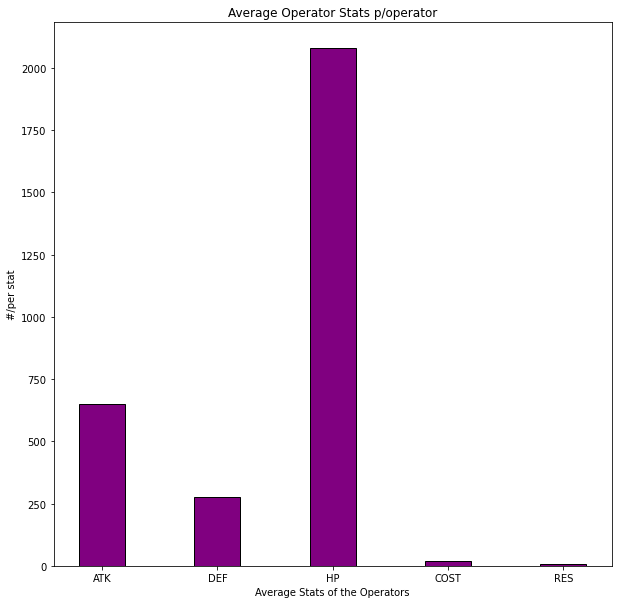

In [44]:
data = {'ATK': averageStatValue("ATK"), 'DEF': averageStatValue("DEF"), 'HP': averageStatValue("HP"), 'COST': averageStatValue("COST"), 'RES': averageStatValue("RES")}

roles = list(data.keys())
values = list(data.values())

plt.bar(roles, values, color ='purple', width = 0.4, edgecolor='black')
 
plt.xlabel("Average Stats of the Operators")
plt.ylabel("#/per stat")
plt.title("Average Operator Stats p/operator")
plt.show()

 * sqlite:///dbfile/arknights.db
Done.


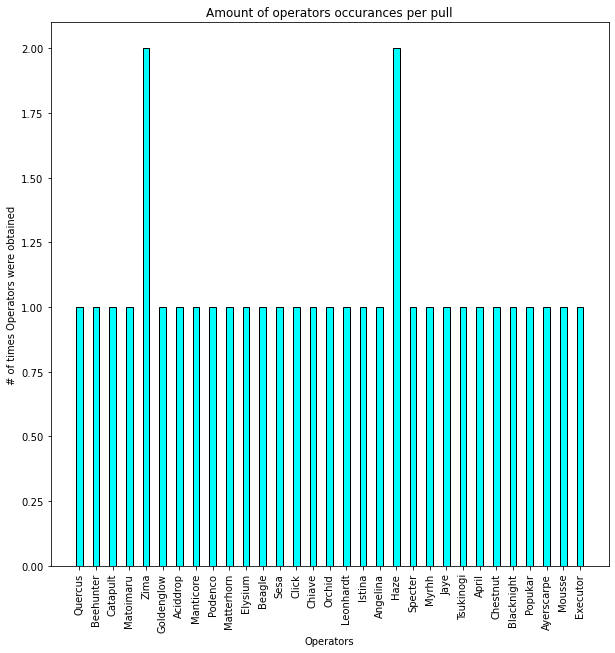

In [48]:
items = shouldYouPull(20300, "Joint Operation 7")
counts = {}

for item in items:
    if item in counts:
        counts[item] += 1
    else:
        counts[item] = 1
        
operatornames = list(counts.keys())
pullvalues = list(counts.values())


plt.bar(range(len(counts)), pullvalues, tick_label=operatornames, color ='cyan', width = 0.4, edgecolor='black')

 
plt.xlabel("Operators")
plt.ylabel("# of times Operators were obtained")
plt.title("Amount of operators occurances per pull")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

---
## Answering our Central Question:

All in all based on the functions we have created and even the bar plots shown above, we can confidently say that some characters are better than other based on their stats and the investment cost of the user to obtain a 6-star is immense as proven within our **ShouldYouPull** function, it takes quite a while just to obtain a top notch operator from the specified banner.

By doing this we can finally let the player know that if they really want a specific character they should start to save up their in-game currency and save it up for an operator they enjoy